## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
merged.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [5]:
# Checking the number of mice.

len(merged["Mouse ID"].unique())



249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_duplicate = merged.loc[merged.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
drop_duplicate

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
merged[merged['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged[merged['Mouse ID'].isin(drop_duplicate) == False]

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grp = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

summary_df = pd.DataFrame({"Mean": grp.mean(),
                           "Median": grp.median(), 
                           "Variance": grp.var(), 
                           "Standard Deviation":grp.std(),
                           "SEM": grp.sem()})
summary_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

grp.agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

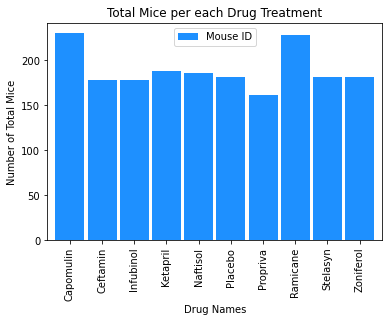

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugname_group = pd.DataFrame(merged.groupby(["Drug Regimen"]).count()).reset_index()
drugname_mouse = drugname_group[["Drug Regimen", "Mouse ID"]]
drugname_mouse = drugname_mouse.set_index("Drug Regimen")

drugname_mouse.plot(kind="bar", color = "dodgerblue", alpha=1, align="center", width=.9)

plt.title("Total Mice per each Drug Treatment")
plt.xlabel("Drug Names")
plt.ylabel("Number of Total Mice")

plt.show()
plt.tight_layout()

#saving the image file 
plt.savefig("../Images/pandas_bar.png")


Text(0, 0.5, 'Number of Total Mice')

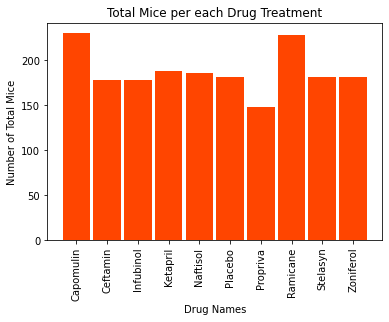

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_count = (clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mouse_count

x_axis = np.arange(len(summary_df))
x_axis


plt.bar(x_axis, mouse_count, color = "orangered", alpha=1, align="center", width=.9)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])
plt.xticks(rotation="vertical")

#labeling the axis of the bar Graph
plt.title("Total Mice per each Drug Treatment")
plt.xlabel("Drug Names")
plt.ylabel("Number of Total Mice")




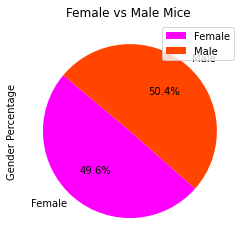

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# first grouping the mice accourding to their gender
Gender_grouped_mice = clean_df.groupby(["Mouse ID","Sex"])
Gender_grouped_mice.head()


mice_gender_df = pd.DataFrame(Gender_grouped_mice.size())
mice_gender_df.head()

# Creating Data frame using the gender group to count each gender
mouse_gender = pd.DataFrame(mice_gender_df.groupby(["Sex"]).count())
mouse_gender
mouse_gender.columns = ["Total Count"]

total_count = mouse_gender["Total Count"]
gender_sum = mouse_gender["Total Count"].sum()
gender_sum

#Calculating the percentage of mouse gender for both female and male
mouse_gender["Gender Percentage"] = (total_count/gender_sum)*100
mouse_gender


plot = mouse_gender.plot.pie(y='Gender Percentage', title= 'Female vs Male Mice ', colors = ['magenta', 'orangered'], startangle=140, shadow = False, autopct="%1.1f%%")

plt.savefig("../Images/pandas_pie.png")



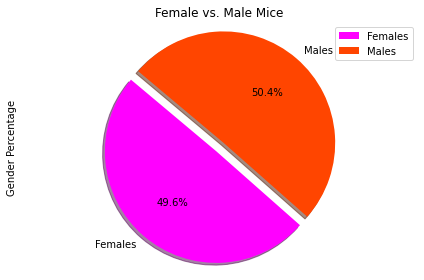

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Females", "Males"]

sizes = [49.596774,50.403226]

explode = (0.1, 0)

colors = ["magenta", "orangered"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title("Female vs. Male Mice")
plt.ylabel('Gender Percentage')
plt.legend(loc="upper right")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
tumor_volume = tumor_volume.sort_values(["Timepoint"], ascending=False)
tumor_volume.head()
merged_df = tumor_volume[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
merged_df.head()



,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098


In [17]:
cap_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin", :]



In [18]:

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes    
# add subset 
# Determine outliers using upper and lower bounds

capomulin_df= merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane_df= merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_df=merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin_df= merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']




    

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#capomuli
quartiles = capomulin_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lowout_cap= lower_bound-(1.5*iqr)
upout_cap= upper_bound+(1.5*iqr)
print(f"Values below {lower_bound} could be capomuli's drug regime outliers.")
print(f"Values above {upper_bound} could be capomuli's drug regime outliers.")
print(f"The interquartile range for capomuli's drug regime is: {iqr}")


Values below 26.714832162499995 could be capomuli's drug regime outliers.
Values above 55.9711007025 could be capomuli's drug regime outliers.
The interquartile range for capomuli's drug regime is: 7.314067135000002


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#ramicane
quartiles = ramicane_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lowout_cap= lower_bound-(1.5*iqr)
upout_cap= upper_bound+(1.5*iqr)
print(f"Values below {lower_bound} could be ramicane's drug regime outliers.")
print(f"Values above {upper_bound} could be ramicane's drug regime ooutliers.")
print(f"The interquartile range is: {iqr}")


Values below 24.18658646249998 could be ramicane's drug regime outliers.
Values above 57.48804812250001 could be ramicane's drug regime ooutliers.
The interquartile range is: 8.325365415000007


In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#infubinol
quartiles = infubinol_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lowout_cap= lower_bound-(1.5*iqr)
upout_cap= upper_bound+(1.5*iqr)
print(f"Values below {lower_bound} could be infubinol's drug regime outliers.")
print(f"Values above {upper_bound} could be infubinol's drug regime ooutliers.")
print(f"The interquartile range is: {iqr}")

Values below 32.309217298749985 could be infubinol's drug regime outliers.
Values above 72.31757996875001 could be infubinol's drug regime ooutliers.
The interquartile range is: 10.002090667500006


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#ceftamin
quartiles = ceftamin_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
lowout_cap= lower_bound-(1.5*iqr)
upout_cap= upper_bound+(1.5*iqr)
print(f"Values below {lower_bound} could be ceftamin's drug regime outliers.")
print(f"Values above {upper_bound} could be ceftamin's drug regime ooutliers.")
print(f"The interquartile range is: {iqr}")


Values below 32.818911426250004 could be ceftamin's drug regime outliers.
Values above 71.19095325625 could be ceftamin's drug regime ooutliers.
The interquartile range is: 9.5930104575


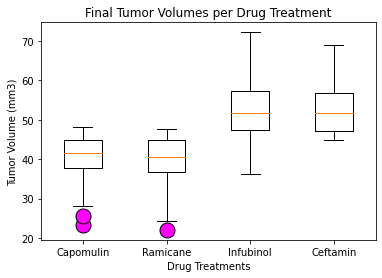

<Figure size 432x288 with 0 Axes>

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


BoxPlot = dict(markerfacecolor='magenta',markersize=15)
plt.boxplot([capomulin_df,ramicane_df, infubinol_df, ceftamin_df], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= BoxPlot)
plt.title("Final Tumor Volumes per Drug Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Treatments")
plt.show()

plt.savefig("../Images/boxplot.png")


## Line and Scatter Plots

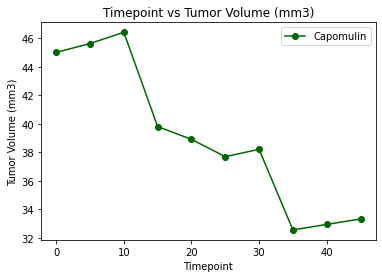

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = clean_df[clean_df["Mouse ID"].isin(["m957"])]
mouse_capomulin
scatter_plot = dict(markerfacecolor='magenta',markersize=15)
plt.plot(mouse_capomulin["Timepoint"], mouse_capomulin["Tumor Volume (mm3)"], marker ='o', color='Darkgreen', label="Capomulin",)
plt.legend(loc="upper right")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

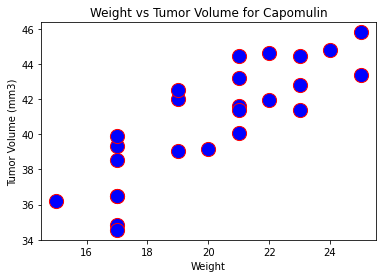

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
captabs= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cap_avg = captabs.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"],facecolors="blue", edgecolors="red", s=200)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

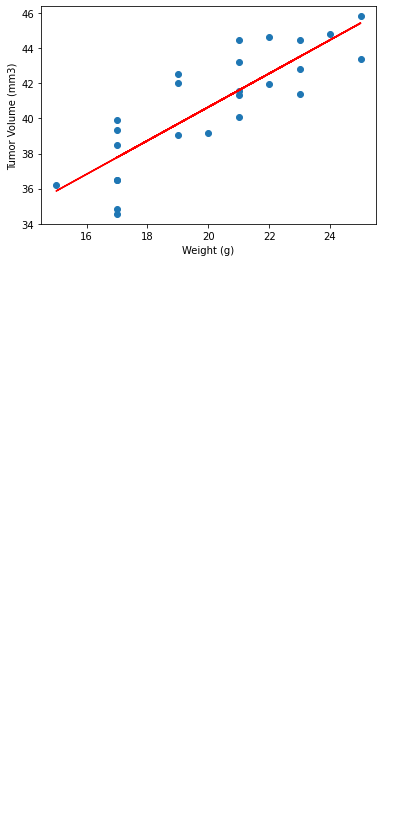

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_avg["Weight (g)"]
y_values = cap_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=20,color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


# conclusion

Throughout the analysis and the observed statistical summary of the drug regime, it is apparent the most effective drug for the gowing tumor is Capomulin, with much lower variance on its performace. The box plots indicate lower volume tumor volume for Capomulin after the treatment in comaprison to the rest of drug regimens. According to the line chart, the selected mice given the timepoints, the volume of the tumor lowers with Capolmulin treatment. The study evidently supports the effectiveness of the Capomulin drug regime, while the rest of the drug remgimens are not as effective.







